In [1]:
import pandas as pd
import copy
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 기호 깨짐 방지

# 대안데이터 불러오기
alter_raw = pd.DataFrame()

# 대안데이터 7월~11월 합치기
for i in range(7,12):
    data = pd.read_csv(f'../alternative_data/대안{i}.csv', encoding='cp949')
    alter_raw = pd.concat([alter_raw, data], axis=0)

alter_raw.shape

(50880, 143)

In [2]:
alter_data = copy.deepcopy(alter_raw)
alter_data.head()

,행정동코드,자치구,행정동,성별,연령대,총인구수,1인가구수,야간상주지 변경 미추정 인구 수,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 25%",...,배달_브랜드 서비스 사용 미추정 인구수,배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 25%","배달_브랜드 서비스 사용일수: 4분위수, 50%","배달_브랜드 서비스 사용일수: 4분위수, 75%",배달_식재료 서비스 사용 미추정 인구수,배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 25%","배달_식재료 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 75%"
0,1101053,종로구,사직동,1,20,206,64,0,2.5,2,...,181,3.5,1.7,3.3,6.7,204,1.7,1.7,1.7,1.7
1,1101053,종로구,사직동,1,25,341,115,0,2.1,1,...,285,2.8,1.7,1.7,3.3,338,1.7,1.7,1.7,1.7
2,1101053,종로구,사직동,1,30,402,132,0,1.9,1,...,348,3.3,1.7,1.7,5.0,396,1.7,1.7,1.7,1.7
3,1101053,종로구,사직동,1,35,408,125,0,1.9,1,...,344,3.2,1.7,3.3,3.3,400,1.7,1.7,1.7,1.7
4,1101053,종로구,사직동,1,40,399,99,0,1.7,1,...,355,3.0,1.7,1.7,5.0,389,1.7,1.7,1.7,1.7


In [3]:
# 1인가구 비율 산정하여 점수화에 활용
alter_data['1인가구 비율'] = round(alter_data['1인가구수'].str.replace(',','').astype(int) / alter_data['총인구수'].str.replace(',','').astype(int),2)

# 사용하지 않을 컬럼 제거
words_to_drop = ['행정동코드','자치구','행정동','1인가구수', '4분위수, 25%', '4분위수, 75%', 
                 '출근', '근무시간', '카카오톡','통화','문자','이동','집 추정','미추정','인구']

# 
pattern = '|'.join(words_to_drop)
alter_data_clean = alter_data.loc[:, ~alter_data.columns.str.contains(pattern)]
alter_data_clean

,성별,연령대,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 50%",주간상주지 변경횟수 평균,"주간상주지 변경횟수: 4분위수, 50%",소액결재 사용횟수 평균,"소액결재 사용횟수: 4분위수, 50%",소액결재 사용금액 평균,"소액결재 사용금액: 4분위수, 50%",...,"유튜브 사용일수: 4분위수, 50%",넷플릭스 사용일수,"넷플릭스 사용일수: 4분위수, 50%",배달 서비스 사용일수,"배달 서비스 사용일수: 4분위수, 50%",배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 50%",배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 50%",1인가구 비율
0,1,20,2.5,2,2.5,2,0.0,0.0,5944.4,3666.7,...,0.4,-0.2,-0.2,11.0,8.3,3.5,3.3,1.7,1.7,0.31
1,1,25,2.1,2,2.2,2,2.6,3.3,7777.8,11000.0,...,0.3,-0.2,-0.2,13.6,10.0,2.8,1.7,1.7,1.7,0.34
2,1,30,1.9,2,1.8,1,2.8,3.3,5854.2,5000.0,...,0.3,-0.3,-0.5,13.7,11.7,3.3,1.7,1.7,1.7,0.33
3,1,35,1.9,2,1.7,1,1.9,1.7,6286.7,5666.7,...,0.2,-0.3,-0.4,13.8,10.0,3.2,3.3,1.7,1.7,0.31
4,1,40,1.7,1,1.7,1,2.8,3.3,6098.0,6333.3,...,0.1,-0.3,-0.5,14.3,10.0,3.0,1.7,1.7,1.7,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2,55,1.6,1,2.6,2,2.3,1.7,5650.9,5000.0,...,-0.1,-0.6,-0.7,6.9,3.3,2.3,1.7,1.7,1.7,0.13
10172,2,60,1.5,1,2.7,2,3.1,3.3,5338.0,4333.3,...,-0.1,-0.6,-0.7,5.1,3.3,2.4,1.7,1.7,1.7,0.14
10173,2,65,1.5,1,2.4,2,2.9,3.3,6270.8,10000.0,...,-0.1,-0.6,-0.7,4.7,3.3,2.4,1.7,1.7,1.7,0.18
10174,2,70,1.5,1,1.3,1,1.7,1.7,5066.7,2333.3,...,-0.2,-0.6,-0.7,4.9,3.3,2.0,1.7,0.0,0.0,0.16


In [5]:
# 아웃라이어 제거(아웃라이어 제거 필요한 칼럼)
alter_outlier = alter_data_clean.iloc[:, 2:]

for column in alter_outlier.columns:
    Q1 = alter_outlier[column].quantile(0.25)
    Q3 = alter_outlier[column].quantile(0.75)
    IQR = Q3 - Q1
    filter = (alter_outlier[column] >= (Q1 - 1.5 * IQR)) & (alter_outlier[column] <= (Q3 + 1.5 * IQR))
    df_cleaned = alter_outlier[filter]

alter_data_clean = pd.concat((alter_data_clean.iloc[df_cleaned.index,:2],df_cleaned), axis=1)
alter_data_clean

,성별,연령대,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 50%",주간상주지 변경횟수 평균,"주간상주지 변경횟수: 4분위수, 50%",소액결재 사용횟수 평균,"소액결재 사용횟수: 4분위수, 50%",소액결재 사용금액 평균,"소액결재 사용금액: 4분위수, 50%",...,"유튜브 사용일수: 4분위수, 50%",넷플릭스 사용일수,"넷플릭스 사용일수: 4분위수, 50%",배달 서비스 사용일수,"배달 서비스 사용일수: 4분위수, 50%",배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 50%",배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 50%",1인가구 비율
0,1,20,2.5,2,2.5,2,0.0,0.0,5944.4,3666.7,...,0.4,-0.2,-0.2,11.0,8.3,3.5,3.3,1.7,1.7,0.31
1,1,25,2.1,2,2.2,2,2.6,3.3,7777.8,11000.0,...,0.3,-0.2,-0.2,13.6,10.0,2.8,1.7,1.7,1.7,0.34
2,1,30,1.9,2,1.8,1,2.8,3.3,5854.2,5000.0,...,0.3,-0.3,-0.5,13.7,11.7,3.3,1.7,1.7,1.7,0.33
3,1,35,1.9,2,1.7,1,1.9,1.7,6286.7,5666.7,...,0.2,-0.3,-0.4,13.8,10.0,3.2,3.3,1.7,1.7,0.31
4,1,40,1.7,1,1.7,1,2.8,3.3,6098.0,6333.3,...,0.1,-0.3,-0.5,14.3,10.0,3.0,1.7,1.7,1.7,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10171,2,55,1.6,1,2.6,2,2.3,1.7,5650.9,5000.0,...,-0.1,-0.6,-0.7,6.9,3.3,2.3,1.7,1.7,1.7,0.13
10172,2,60,1.5,1,2.7,2,3.1,3.3,5338.0,4333.3,...,-0.1,-0.6,-0.7,5.1,3.3,2.4,1.7,1.7,1.7,0.14
10173,2,65,1.5,1,2.4,2,2.9,3.3,6270.8,10000.0,...,-0.1,-0.6,-0.7,4.7,3.3,2.4,1.7,1.7,1.7,0.18
10174,2,70,1.5,1,1.3,1,1.7,1.7,5066.7,2333.3,...,-0.2,-0.6,-0.7,4.9,3.3,2.0,1.7,0.0,0.0,0.16


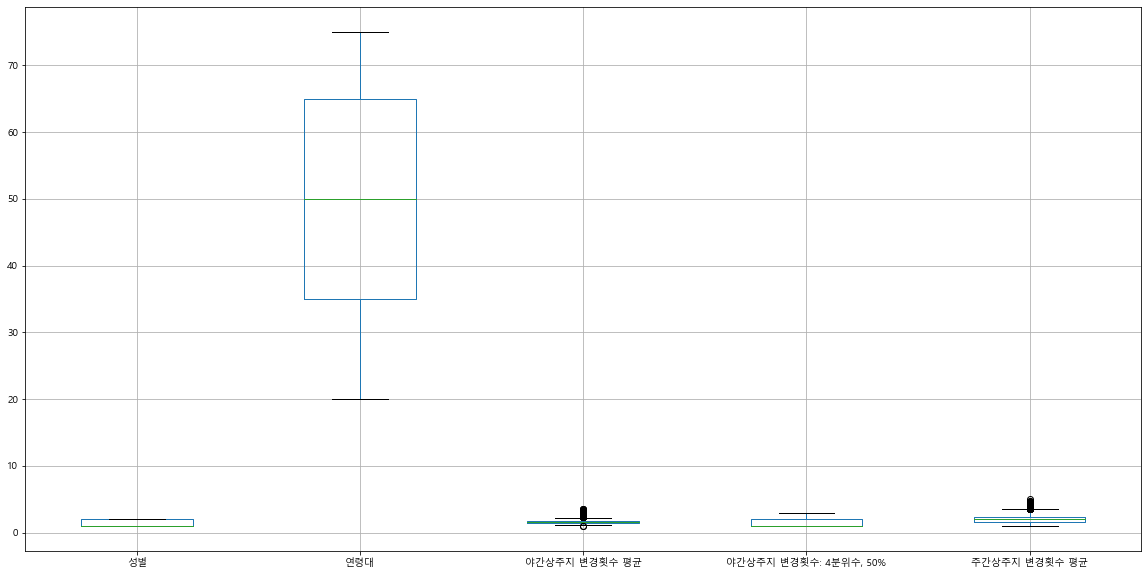

In [6]:
alter_data_clean.iloc[:,:5].boxplot(figsize=(20,10))
plt.show()

In [14]:
# alter_data_clean을 복사본으로 생성
alter_data_clean = alter_data_clean.copy()

# 연체여부 데이터 부족으로 평균 이상, 평균이하에 따라 여부 판단
alter_mean = alter_data_clean['최근 3개월 내 요금 연체 비율'].mean()
alter_data_clean.loc[:, '최근 3개월 내 요금 연체 비율'] = alter_data_clean['최근 3개월 내 요금 연체 비율'].apply(lambda x: 1 if x > alter_mean else 0)

# 컬럼 이름 변경
alter_data_clean.rename(columns={'최근 3개월 내 요금 연체 비율': '연체여부'}, inplace=True)

# 연체여부 비율 확인
alter_data_clean['연체여부'].value_counts()

0    26613
1    22010
Name: 연체여부, dtype: int64

In [15]:
# 성별 원핫 인코딩
gender = pd.get_dummies(alter_data_clean['성별'])
alter_data_clean = alter_data_clean.drop('성별', axis=1)
alter_data_clean = pd.concat([alter_data_clean,gender], axis=1)

alter_data_clean.rename(columns={1: '남자',2:'여자'}, inplace=True)
alter_data_clean.head()

,연령대,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 50%",주간상주지 변경횟수 평균,"주간상주지 변경횟수: 4분위수, 50%",소액결재 사용횟수 평균,"소액결재 사용횟수: 4분위수, 50%",소액결재 사용금액 평균,"소액결재 사용금액: 4분위수, 50%",연체여부,...,"넷플릭스 사용일수: 4분위수, 50%",배달 서비스 사용일수,"배달 서비스 사용일수: 4분위수, 50%",배달_브랜드 서비스 사용일수,"배달_브랜드 서비스 사용일수: 4분위수, 50%",배달_식재료 서비스 사용일수,"배달_식재료 서비스 사용일수: 4분위수, 50%",1인가구 비율,남자,여자
0,20,2.5,2,2.5,2,0.0,0.0,5944.4,3666.7,0,...,-0.2,11.0,8.3,3.5,3.3,1.7,1.7,0.31,1,0
1,25,2.1,2,2.2,2,2.6,3.3,7777.8,11000.0,1,...,-0.2,13.6,10.0,2.8,1.7,1.7,1.7,0.34,1,0
2,30,1.9,2,1.8,1,2.8,3.3,5854.2,5000.0,1,...,-0.5,13.7,11.7,3.3,1.7,1.7,1.7,0.33,1,0
3,35,1.9,2,1.7,1,1.9,1.7,6286.7,5666.7,1,...,-0.4,13.8,10.0,3.2,3.3,1.7,1.7,0.31,1,0
4,40,1.7,1,1.7,1,2.8,3.3,6098.0,6333.3,0,...,-0.5,14.3,10.0,3.0,1.7,1.7,1.7,0.25,1,0


In [16]:
# 나이 앞자리만 남기기
alter_data_clean['연령대'] = alter_data_clean['연령대'].astype(str).str[0].astype(int)
alter_data_clean['연령대'].head()

age_df = pd.get_dummies(alter_data_clean['연령대'])
alter_data_clean = alter_data_clean.drop('연령대', axis=1)
alter_data_clean = pd.concat([alter_data_clean,age_df], axis=1)

age_keys = [1,2,3,4,5,6,7]
age_values = ['10대','20대','30대','40대','50대','60대','70대']

alter_data_clean.rename(columns=dict(zip(age_keys,age_values)), inplace=True)
alter_data_clean.head()

,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 50%",주간상주지 변경횟수 평균,"주간상주지 변경횟수: 4분위수, 50%",소액결재 사용횟수 평균,"소액결재 사용횟수: 4분위수, 50%",소액결재 사용금액 평균,"소액결재 사용금액: 4분위수, 50%",연체여부,SNS 사용횟수,...,"배달_식재료 서비스 사용일수: 4분위수, 50%",1인가구 비율,남자,여자,20대,30대,40대,50대,60대,70대
0,2.5,2,2.5,2,0.0,0.0,5944.4,3666.7,0,0.0,...,1.7,0.31,1,0,1,0,0,0,0,0
1,2.1,2,2.2,2,2.6,3.3,7777.8,11000.0,1,0.2,...,1.7,0.34,1,0,1,0,0,0,0,0
2,1.9,2,1.8,1,2.8,3.3,5854.2,5000.0,1,0.2,...,1.7,0.33,1,0,0,1,0,0,0,0
3,1.9,2,1.7,1,1.9,1.7,6286.7,5666.7,1,0.1,...,1.7,0.31,1,0,0,1,0,0,0,0
4,1.7,1,1.7,1,2.8,3.3,6098.0,6333.3,0,0.1,...,1.7,0.25,1,0,0,0,1,0,0,0


In [17]:
# 칼럼 순서조정(평균, 중간값 나누기 위해서)
for i in ['연체여부','1인가구 비율']:
    column_move = alter_data_clean.pop(i)
    alter_data_clean.insert(2, i, column_move)
print(alter_data_clean.columns[4:])


Index(['주간상주지 변경횟수 평균', '주간상주지 변경횟수: 4분위수, 50%', '소액결재 사용횟수 평균',
       '소액결재 사용횟수: 4분위수, 50%', '소액결재 사용금액 평균', '소액결재 사용금액: 4분위수, 50%',
       'SNS 사용횟수', 'SNS 사용횟수: 4분위수, 50%', '데이터 사용량', '데이터 사용량: 4분위수, 50%',
       '게임 서비스 사용일수', '게임 서비스 사용일수: 4분위수, 50%', '금융 서비스 사용일수',
       '금융 서비스 사용일수: 4분위수, 50%', '쇼핑 서비스 사용일수', '쇼핑 서비스 사용일수: 4분위수, 50%',
       '동영상/방송 서비스 사용일수', '동영상/방송 서비스 사용일수: 4분위수, 50%', '유튜브 사용일수',
       '유튜브 사용일수: 4분위수, 50%', '넷플릭스 사용일수', '넷플릭스 사용일수: 4분위수, 50%',
       '배달 서비스 사용일수', '배달 서비스 사용일수: 4분위수, 50%', '배달_브랜드 서비스 사용일수',
       '배달_브랜드 서비스 사용일수: 4분위수, 50%', '배달_식재료 서비스 사용일수',
       '배달_식재료 서비스 사용일수: 4분위수, 50%', '남자', '여자', '20대', '30대', '40대', '50대',
       '60대', '70대'],
      dtype='object')


In [18]:
alter_avg = pd.DataFrame()
alter_mid = pd.DataFrame()

# 중간, 평균 컬럼 나누기
for i in range(4, alter_data_clean.shape[1] - 8, 2):
    alter_avg[alter_data_clean.columns[i]] = alter_data_clean.iloc[:, i]
    alter_mid[alter_data_clean.columns[i+1]] = alter_data_clean.iloc[:, i+1]

# 기존 데이터와 사분위 50% 차이값 데이터 결합
alter_mid = pd.concat((alter_data_clean.iloc[:,:4], alter_mid, alter_data_clean.iloc[:,-8:]),axis=1)
alter_avg = pd.concat((alter_data_clean.iloc[:,:4], alter_avg, alter_data_clean.iloc[:,-8:]),axis=1)

display(alter_avg.head())
display(alter_mid.head())

,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 50%",1인가구 비율,연체여부,주간상주지 변경횟수 평균,소액결재 사용횟수 평균,소액결재 사용금액 평균,SNS 사용횟수,데이터 사용량,게임 서비스 사용일수,...,배달_브랜드 서비스 사용일수,배달_식재료 서비스 사용일수,남자,여자,20대,30대,40대,50대,60대,70대
0,2.5,2,0.31,0,2.5,0.0,5944.4,0.0,21.4,56.8,...,3.5,1.7,1,0,1,0,0,0,0,0
1,2.1,2,0.34,1,2.2,2.6,7777.8,0.2,19.8,41.3,...,2.8,1.7,1,0,1,0,0,0,0,0
2,1.9,2,0.33,1,1.8,2.8,5854.2,0.2,17.1,34.0,...,3.3,1.7,1,0,0,1,0,0,0,0
3,1.9,2,0.31,1,1.7,1.9,6286.7,0.1,13.6,33.2,...,3.2,1.7,1,0,0,1,0,0,0,0
4,1.7,1,0.25,0,1.7,2.8,6098.0,0.1,11.2,22.5,...,3.0,1.7,1,0,0,0,1,0,0,0


,야간상주지 변경횟수 평균,"야간상주지 변경횟수: 4분위수, 50%",1인가구 비율,연체여부,"주간상주지 변경횟수: 4분위수, 50%","소액결재 사용횟수: 4분위수, 50%","소액결재 사용금액: 4분위수, 50%","SNS 사용횟수: 4분위수, 50%","데이터 사용량: 4분위수, 50%","게임 서비스 사용일수: 4분위수, 50%",...,"배달_브랜드 서비스 사용일수: 4분위수, 50%","배달_식재료 서비스 사용일수: 4분위수, 50%",남자,여자,20대,30대,40대,50대,60대,70대
0,2.5,2,0.31,0,2,0.0,3666.7,0.0,16.4,50.0,...,3.3,1.7,1,0,1,0,0,0,0,0
1,2.1,2,0.34,1,2,3.3,11000.0,0.2,16.5,25.0,...,1.7,1.7,1,0,1,0,0,0,0,0
2,1.9,2,0.33,1,1,3.3,5000.0,0.2,12.2,21.7,...,1.7,1.7,1,0,0,1,0,0,0,0
3,1.9,2,0.31,1,1,1.7,5666.7,0.1,8.7,16.7,...,3.3,1.7,1,0,0,1,0,0,0,0
4,1.7,1,0.25,0,1,3.3,6333.3,0.1,6.6,10.0,...,1.7,1.7,1,0,0,0,1,0,0,0


In [19]:
alter_avg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48623 entries, 0 to 10175
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   야간상주지 변경횟수 평균          48623 non-null  float64
 1   야간상주지 변경횟수: 4분위수, 50%  48623 non-null  int64  
 2   1인가구 비율                48623 non-null  float64
 3   연체여부                   48623 non-null  int64  
 4   주간상주지 변경횟수 평균          48623 non-null  float64
 5   소액결재 사용횟수 평균           48623 non-null  float64
 6   소액결재 사용금액 평균           48623 non-null  float64
 7   SNS 사용횟수               48623 non-null  float64
 8   데이터 사용량                48623 non-null  float64
 9   게임 서비스 사용일수            48623 non-null  float64
 10  금융 서비스 사용일수            48623 non-null  float64
 11  쇼핑 서비스 사용일수            48623 non-null  float64
 12  동영상/방송 서비스 사용일수        48623 non-null  float64
 13  유튜브 사용일수               48623 non-null  float64
 14  넷플릭스 사용일수              48623 non-null  float64
 15  배달

In [20]:
alter_avg.corr()['연체여부'].sort_values(ascending=False)

연체여부                     1.000000
데이터 사용량                  0.480823
동영상/방송 서비스 사용일수          0.466171
게임 서비스 사용일수              0.439723
SNS 사용횟수                 0.433773
유튜브 사용일수                 0.433201
배달 서비스 사용일수              0.428876
주간상주지 변경횟수 평균            0.422322
금융 서비스 사용일수              0.418086
넷플릭스 사용일수                0.388246
쇼핑 서비스 사용일수              0.376003
소액결재 사용금액 평균             0.314312
야간상주지 변경횟수 평균            0.269471
20대                      0.227767
배달_브랜드 서비스 사용일수          0.204526
소액결재 사용횟수 평균             0.201863
30대                      0.194661
배달_식재료 서비스 사용일수          0.175533
야간상주지 변경횟수: 4분위수, 50%    0.171947
남자                       0.131195
1인가구 비율                  0.088046
40대                      0.071038
50대                      0.028885
여자                      -0.131195
60대                     -0.149384
70대                     -0.362109
Name: 연체여부, dtype: float64

In [ ]:
alter_avg.iloc[:,:5].boxplot(figsize=(20,10))
plt.show()

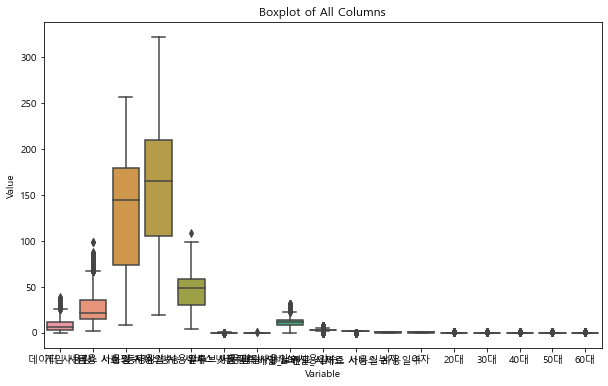

In [40]:
data_melted = alter_avg.iloc[:,8:-1].melt(var_name='Variable', value_name='Value')

# boxplot 그리기
plt.figure(figsize=(10, 6))
sns.boxplot(x='Variable', y='Value', data=data_melted)
plt.title('Boxplot of All Columns')
plt.show()